<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/02_Introduction_to_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

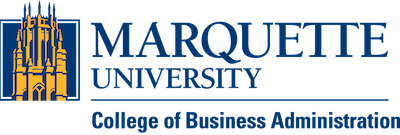

#BUAN4060: Unstructured Data Analytics

##02 Introduction to Text Analytics

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



## 1. Text Mining

A fundamental requirement to perform text mining is to get your text in a tidy format and perform word frequency analysis.

Text is often in an unstructured format so performing even the most basic analysis requires some re-structuring.

Thus, this first text mining tutorial covers the basics of text tidying and basic word frequency analysis.

This tutorial serves as an introduction to basic text mining. First, I provide the data and packages required to replicate the analysis in this tutorial and then I walk through the basic operations to tidy unstructured text and perform word frequency analysis.

1. Replication requirements: What you’ll need to reproduce the analysis in this tutorial
2. Text tidying: Transforming your text into a tidy data structure
3. Word frequency analysis: Identifying the most common words in text

### a. Replication Requirements

This tutorial leverages the data provided in the [harrypotter package](https://github.com/bradleyboehmke/harrypotter). I constructed this package to supply the first seven novels in the [Harry Potter series](https://github.com/bradleyboehmke/harrypotter) to illustrate text mining and analysis capabilities. You can load the harrypotter package with the following:

In [1]:
#install.packages("devtools")
devtools::install_github("ibader85/harrypotter",force = TRUE)

── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpI7o3Ym/remotes18162b0a624/ibader85-harrypotter-2c07a3a/DESCRIPTION’ ... OK
* preparing ‘harrypotter’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘harrypotter_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tidyverse")
install.packages("stringr")
install.packages("tidytext")
#install.packages("harrypotter")

library(tidyverse)      # data manipulation & plotting
library(stringr)        # text cleaning and regular expressions
library(tidytext)       # provides additional text mining functions
library(harrypotter)    # provides the first seven novels of the Harry Potter series

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


**The Data Set:**

This package provides access to the full texts of the first seven Harry Potter books. The UTF-8 plain text for each novel was sourced from [Read Vampire Books](https://github.com/bradleyboehmke/harrypotter/blob/master/www.readbooksvampire.com), processed a bit, and is ready for text analysis. Each text is in a character vector with each element representing a single chapter. The package contains:

- `philosophers_stone`: Harry Potter and the Philosophers Stone, published in 1997
-`chamber_of_secrets`: Harry Potter and the Chamber of Secrets, published in 1998
-`prisoner_of_azkaban`: Harry Potter and the Prisoner of Azkaban, published in 1999
-`goblet_of_fire`: Harry Potter and the Goblet of Fire, published in 2000
-`order_of_the_phoenix`: Harry Potter and the Order of the Phoenix, published in 2003
-`half_blood_prince`: Harry Potter and the Half-Blood Prince, published in 2005
-`deathly_hallows`: Harry Potter and the Deathly Hallows, published in 2007

Each text is in a character vector with each element representing a single chapter.

For instance, the following illustrates the raw text of the first two chapters of the philosophers_stone:

In [3]:
philosophers_stone[1:2]

[1] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.　　The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years; in fact, Mrs. Dursley pretended she didn't have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be. The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street. The Dursleys knew that the Potters had a small son, too, but they had never even seen him. This boy was another good reason for keeping the Potters away; they didn't want Dudley mixing with a child like that.　　When Mr. and Mrs. Dursley woke up on the dull, gray Tuesday our story starts, there was nothing about the cloudy sky outside to suggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his most boring tie for work, and Mrs. Dursley gossiped away happily as she wrestled a screaming Dudley into his high chair.　　None of them noticed a large, tawny owl flutter past the window.　　At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls. \"Little tyke,\" chortled Mr. Dursley as he left the house. He got into his car and backed out of number four's drive.　　It was on the corner of the street that he noticed the first sign of something peculiar -- a cat reading a map. For a second, Mr. Dursley didn't realize what he had seen -- then he jerked his head around to look again. There was a tabby cat standing on the corner of Privet Drive, but there wasn't a map in sight. What could he have been thinking of? It must have been a trick of the light. Mr. Dursley blinked and stared at the cat. It stared back. As Mr. Dursley drove around the corner and up the road, he watched the cat in his mirror. It was now reading the sign that said Privet Drive -- no, looking at the sign; cats couldn't read maps or signs. Mr. Dursley gave himself a little shake and put the cat out of his mind. As he drove toward town he thought of nothing except a large order of drills he was hoping to get that day.　　But on the edge of town, drills were driven out of his mind by something else. As he sat in the usual morning traffic jam, he couldn't help noticing that there seemed to be a lot of strangely dressed people about. People in cloaks. Mr. Dursley couldn't bear people who dressed in funny clothes -- the getups you saw on young people! He supposed this was some stupid new fashion. He drummed his fingers on the steering wheel and his eyes fell on a huddle of these weirdos standing quite close by. They were whispering excitedly together. Mr. Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr. Dursley that this was probably some silly stunt -- these people were obviously collecting for something... yes, that would be it. The traffic moved on and a fe

###b. Text Tidying

Although we can do some simple regex analysis on this character vector, to properly analyze this text we want to turn it into a data frame or tibble. To do this on the `philosophers_stone` novel we could perform the following:

In [4]:
text_tb <- tibble(chapter = seq_along(philosophers_stone),
                  text = philosophers_stone)
# Tibbles are data frames that are lazy and surly: they do less (i.e. they don't change variable names or types, and don't do partial matching)
# and complain more (e.g. when a variable does not exist)
#This forces you to confront problems earlier, typically leading to cleaner, more expressive code

text_tb

chapter
1   1     
2   2     
3   3     
4   4     
5   5     
6   6     
7   7     
8   8     
9   9     
10 10     
11 11     
12 12     
13 13     
14 14     
15 15     
16 16     
17 17     
   text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

This creates a 2-column tibble. The second column contains the full text for each chapter; however, this isn’t very conducive to future analyses

We can unnest these texts:

In [5]:
text_tb %>%
        unnest_tokens(word, text)
# unnset to tokenize the text data in the text_tb tibble
# The result is a new tibble with two columns: chapter and word
# Each row represents a word from the book "Harry Potter and the Philosopher's Stone," and the chapter column indicates the chapter in which the word appears
# This tokenization step is often a precursor to various text analysis tasks such as word frequency analysis, sentiment analysis, and more
# If you have any specific text analysis or tasks you'd do

chapter,word
<int>,<chr>
1,the
1,boy
1,who
1,lived
1,mr
1,and
1,mrs
1,dursley
1,of


Now we’ve split up the entire `philosophers_stone` text into a tibble that provides each word in each chapter.

Its important to note that the unnest_token function does the following:

- splits the text into single words (you’ll learn about bi-grams, tri-grams, etc. in later tutorials)
- strips all punctuation
- converts each word to lowercase for easy comparability (use the `to_lower = FALSE` argument to turn this off)

This now lets us do some simple analysis on the `philosophers_stone` text; however, what if we want to analyze text across all seven novels? To do this we can perform the same steps by looping through each novel and then combining them.

In [7]:
titles <- c("Philosopher's Stone", "Chamber of Secrets", "Prisoner of Azkaban",
            "Goblet of Fire", "Order of the Phoenix", "Half-Blood Prince",
            "Deathly Hallows")

# Creates a vector using the c() (concatenate) function
# A vector in R is a one-dimensional array that holds elements of the same type
# In this case, all the elements are the titles of the 7 books

In [6]:
books <- list(philosophers_stone, chamber_of_secrets, prisoner_of_azkaban,
           goblet_of_fire, order_of_the_phoenix, half_blood_prince,
           deathly_hallows)

# Creates a list  using the list() function
# A list in R is more flexible than a vector because it can hold elements of different types, including other lists, vectors, or even functions
# In this case, books likely contains the actual content of the 7 books

In [8]:
series <- tibble()
# creates a tibble & store the final output as the loop progresses

for(i in seq_along(titles)) {
# seq_along(titles) creates a sequence of indices (1, 2, …, length of titles), corresponding to each book in the titles vector
# The loop iterates over each book and its title, using i to reference both

        clean <- tibble(chapter = seq_along(books[[i]]),
                        text = books[[i]]) %>%
# This creates a tibble for the current book (books[[i]]) where:
# chapter is a sequence numbering the chapters (or sections) of the book
# text contains the full text of each chapter/section

             unnest_tokens(word, text) %>%
# Tokenize the text column into individual words. The word column will hold each token (word), breaking the text into smaller pieces

             mutate(book = titles[i]) %>%
# Add a new column book, assigning the current title from titles[i] to every row in the resulting tibble

             select(book, everything())
# Reorder the columns so that book appears first, followed by the other columns

        series <- rbind(series, clean)
}
# Combine the clean tibble (processed book) with the series tibble (the cumulative result of all processed books)
# This appends the new book’s data to the existing data frame.

In [9]:
series$book <- factor(series$book, levels = rev(titles))
# set factor to keep books in order of publication

series

book,chapter,word
<fct>,<int>,<chr>
Philosopher's Stone,1,the
Philosopher's Stone,1,boy
Philosopher's Stone,1,who
Philosopher's Stone,1,lived
Philosopher's Stone,1,mr
Philosopher's Stone,1,and
Philosopher's Stone,1,mrs
Philosopher's Stone,1,dursley
Philosopher's Stone,1,of


We now have a tidy tibble with every individual word by chapter by book.

We can now proceed to perform some simple word frequency analyses.

### c. Word Frequency

The simplest word frequency analysis is assessing the most common words in text.

We can use count to assess the most common words across all the text in the Harry Potter series.

In [11]:
series %>%
        count(word, sort = TRUE)
# Count the frequency of words in the combined text data from the Harry Potter series

word,n
<chr>,<int>
the,51593
and,27430
to,26985
of,21802
a,20966
he,20322
harry,16557
was,15631
said,14398


One thing you will notice is that a lot of the most common words are not very informative (i.e. the, and, to, of, a, he, …)

These are considered stop words. Most of the time we want our text mining to identify words that provide context (i.e. harry, dumbledore, granger, afraid, etc.)

Thus, we can remove the stop words from our tibble with anti_join and the built-in stop_words data set provided by tidytext

Now we start to see characters and other nouns, verbs, and adjectives that we would expect to be common in this series

In [12]:
series %>%
        anti_join(stop_words) %>%
        count(word, sort = TRUE)
# filter out stop words and count the frequency of significant words in the combined text data from the Harry Potter series

Joining with `by = join_by(word)`


word,n
<chr>,<int>
harry,16557
ron,5750
hermione,4912
dumbledore,2873
looked,2344
professor,2006
hagrid,1732
time,1713
wand,1639


We can perform this same assessment but grouped by book or even each chapter within each book

In [13]:
series %>%
        anti_join(stop_words) %>%
        group_by(book) %>%
        count(word, sort = TRUE) %>%
        top_n(10)
# top 10 most common words in each book

Joining with `by = join_by(word)`
Selecting by n


book,word,n
<fct>,<chr>,<int>
Order of the Phoenix,harry,3730
Goblet of Fire,harry,2936
Deathly Hallows,harry,2770
Half-Blood Prince,harry,2581
Prisoner of Azkaban,harry,1824
Chamber of Secrets,harry,1503
Order of the Phoenix,hermione,1220
Philosopher's Stone,harry,1213
Order of the Phoenix,ron,1189


We can visualize this with

Joining with `by = join_by(word)`
Selecting by n


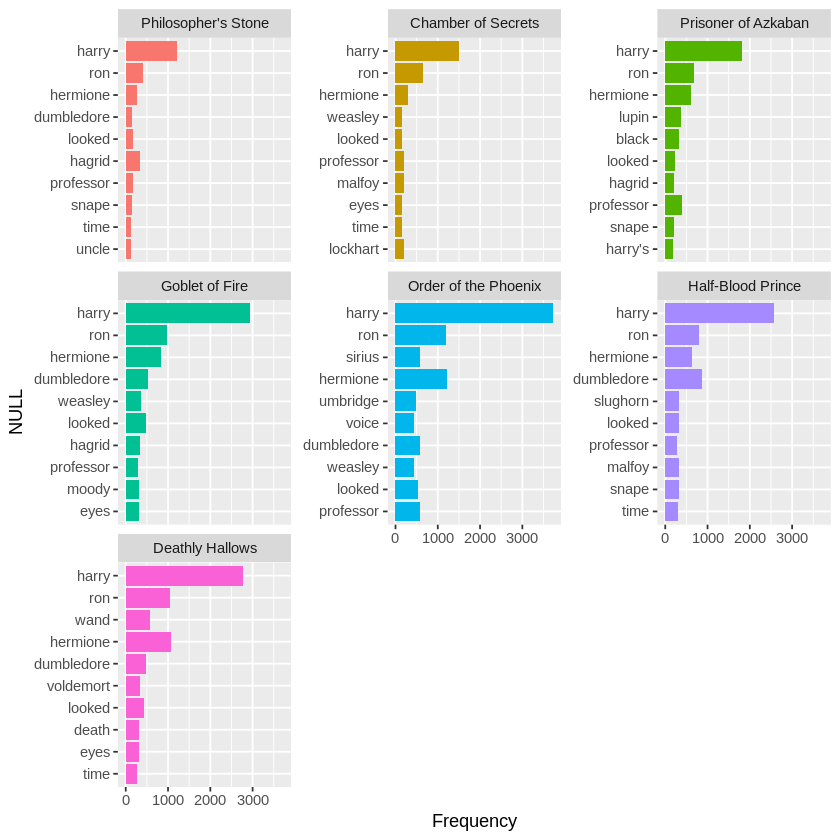

In [14]:
# top 10 most common words in each book
series %>%
        anti_join(stop_words) %>%
        # Remove stopwords using the anti_join function. It ensures that these words are not included in the analysis.
        group_by(book) %>%
        count(word, sort = TRUE) %>%
        top_n(10) %>%
        ungroup() %>%
        # remove the grouping created earlier with group_by(book). This step is necessary to prepare the data for plotting
        mutate(book = factor(book, levels = titles),
        # convert the book column into a factor with levels ordered according to the titles vector, ensuring the correct order for plotting
               text_order = nrow(.):1) %>%
                 # Create a new column text_order that assigns a numeric value to each row based on its position within each book's data frame
                 # This helps in ordering the words correctly in the plot.
        ggplot(aes(reorder(word, text_order), n, fill = book)) +
          geom_bar(stat = "identity") +
          # add a bar layer to the plot, where stat = "identity" means that the height of the bars is determined by the n (frequency) variable in the data
          facet_wrap(~ book, scales = "free_y") +
            # line creates facets (subplots) in the plot, one for each book. ~ book specifies that the data should be faceted by the book variable,
            # and scales = "free_y" allows each facet to have its own y-axis scale
          labs(x = "NULL", y = "Frequency") +
          coord_flip() +
          # rotate the plot 90 degrees, making it a horizontal bar chart for better readability
          theme(legend.position="none")

Now, let’s calculate the frequency for each word across the entire Harry Potter series versus within each book

This will allow us to compare strong deviations of word frequency within each book as compared to across the entire series

In [15]:
# calculate percent of word use across all novels
potter_pct <- series %>%
        anti_join(stop_words) %>%
        count(word) %>%
        transmute(word, all_words = n / sum(n))

# calculate percent of word use within each novel
frequency <- series %>%
        anti_join(stop_words) %>%
        count(book, word) %>%
        mutate(book_words = n / sum(n)) %>%
        left_join(potter_pct) %>%
        arrange(desc(book_words)) %>%
        ungroup()

frequency

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`


book,word,n,book_words,all_words
<fct>,<chr>,<int>,<dbl>,<dbl>
Order of the Phoenix,harry,3730,0.009112274,0.040448236
Goblet of Fire,harry,2936,0.007172557,0.040448236
Deathly Hallows,harry,2770,0.006767024,0.040448236
Half-Blood Prince,harry,2581,0.006305303,0.040448236
Prisoner of Azkaban,harry,1824,0.004455975,0.040448236
Chamber of Secrets,harry,1503,0.003671782,0.040448236
Order of the Phoenix,hermione,1220,0.002980422,0.011999863
Philosopher's Stone,harry,1213,0.002963321,0.040448236
Order of the Phoenix,ron,1189,0.002904690,0.014047071


We can visualize this

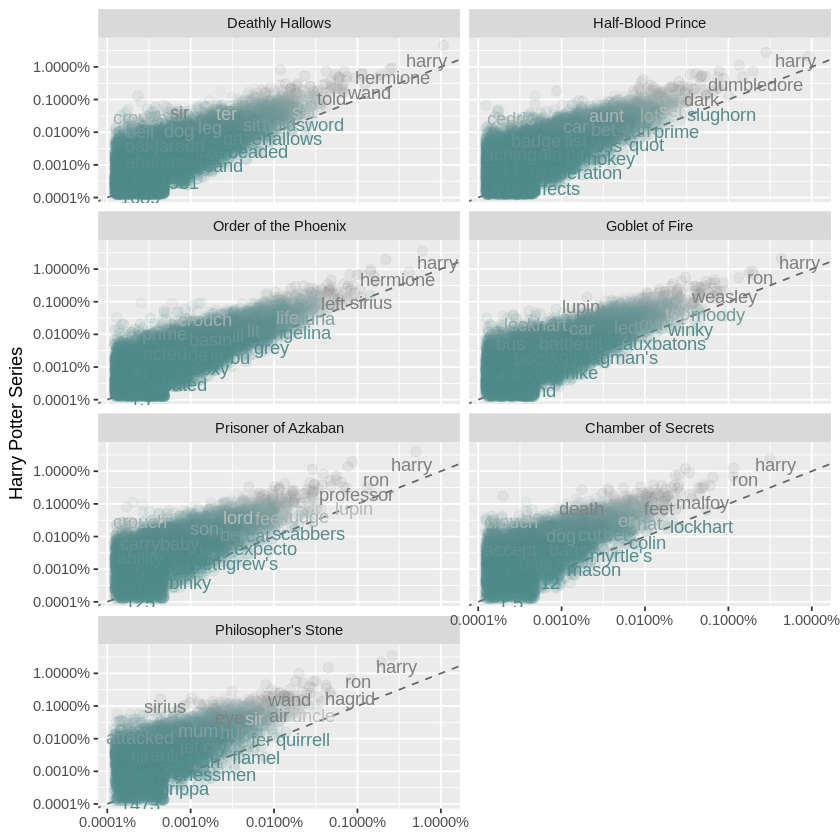

In [16]:
ggplot(frequency, aes(x = book_words, y = all_words, color = abs(all_words - book_words))) +
  # Map the book_words column to the x-axis and the all_words column to the y-axis
  # The color aesthetic is assigned to the absolute difference between all_words and book_words
        geom_abline(color = "gray40", lty = 2) +
          # add a gray dashed line to the plot, representing the line of equality where book_words is equal to all_words
        geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
          # add jittered points to the plot with alpha transparency to avoid overplotting. The size, width, and height parameters control the appearance of the points.
        geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
          # add text labels to the plot, labeling each point with the corresponding word.
          # check_overlap = TRUE prevents label overlap, and vjust = 1.5 adjusts the vertical position of the labels.
        scale_x_log10(labels = scales::percent_format()) +
        scale_y_log10(labels = scales::percent_format()) +
        scale_color_gradient(limits = c(0, 0.001), low = "darkslategray4", high = "gray75") +
        facet_wrap(~ book, ncol = 2) +
        theme(legend.position="none") +
        labs(y = "Harry Potter Series", x = NULL)

Words that are close to the line in these plots have similar frequencies across all the novels. For example, words such as “harry”, “ron”, “dumbledore” are fairly common and used with similar frequencies across most of the books. Words that are far from the line are words that are found more in one set of texts than another.

Furthermore, words standing out above the line are common across the series but not within that book; whereas words below the line are common in that particular book but not across the series. For example, “cedric” stands out above the line in the Half-Blood Prince. This means that “cedric” is fairly common across the entire Harry Potter series but is not used as much in Half-Blood Prince.

In contrast, a word below the line such as “quirrell” in the Philosopher’s Stone suggests this word is common in this novel but far less common across the series.

Let’s quantify how similar and different these sets of word frequencies are using a correlation test. How correlated are the word frequencies between the entire series and each book?

In [17]:
# calculate the correlation between book_words and all_words for each book in the Harry Potter series, along with the corresponding p-value for each correlation

frequency %>%
        group_by(book) %>%
        summarize(correlation = cor(book_words, all_words),
      # summarize is used to calculate summary statistics for each group (book).
                  p_value = cor.test(book_words, all_words)$p.value)
                  # calculate the p-value for the correlation coefficient using a correlation test (cor.test)
                  # The p-value measures the significance of the correlation. A low p-value indicates a strong and significant correlation,
                  # while a high p-value suggests a weak or non-significant correlation

book,correlation,p_value
<fct>,<dbl>,<dbl>
Deathly Hallows,0.9703948,0
Half-Blood Prince,0.9703266,0
Order of the Phoenix,0.9844414,0
Goblet of Fire,0.9793959,0
Prisoner of Azkaban,0.9641515,0
Chamber of Secrets,0.9656789,0
Philosopher's Stone,0.9551352,0


The high correlations, which are all statistically significant (p-values < 0.0001), suggests that the relationship between the word frequencies is highly similar across the entire Harry Potter series.